In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# STEP 1:  BUILDING THE KNN CLASSIFIER

In [73]:
data=pd.read_csv("Iris.csv")

In [144]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [75]:
X=data.iloc[:,1:3].values

In [76]:
X.shape

(150, 2)

In [77]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [78]:
data['Species'].replace({'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2},inplace=True)

In [79]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [80]:
y=data.iloc[:,-1].values

In [81]:
y.shape

(150,)

In [82]:
#WE WILL DIVIDE THE DATA INTO TRAINING AND TESTING PART
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20) #WE WILL TAKE ONLY 20% OF THE DATA AS TEST DATA REST EVERYTHING AS TRAIN DATA

In [83]:
X_train.shape

(120, 2)

In [84]:
X_test.shape

(30, 2)

In [85]:
y_train.shape #X TRAIN AND Y TRAIN MUST BE EQUAL

(120,)

In [86]:
y_test.shape

(30,)

In [87]:
#we will import this class because the difference between the columns is very much and if we will calculate the distance it will be very much diffrent for the first two points
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [88]:
#standardization operation
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.74692126, -0.33388442],
       [-0.96498559,  1.2506518 ],
       [-0.47586934,  0.79792717],
       [ 0.0132469 , -0.78660905],
       [-0.96498559, -1.69205832],
       [ 1.48059562,  0.34520253],
       [ 0.50236314,  0.79792717],
       [ 0.6246422 , -0.56024674],
       [-0.35359028,  2.60882571],
       [ 0.86920032, -0.1075221 ],
       [-0.23131122, -0.1075221 ],
       [-0.35359028, -1.23933369],
       [ 0.99147938, -0.1075221 ],
       [ 0.74692126, -0.56024674],
       [ 0.25780502, -0.78660905],
       [ 2.58110717,  1.70337644],
       [ 0.25780502, -1.91842064],
       [ 0.50236314, -0.56024674],
       [ 0.13552596, -0.1075221 ],
       [ 2.33654905,  1.70337644],
       [-0.47586934,  1.92973876],
       [-1.20954371,  0.79792717],
       [-1.45410183,  0.11884022],
       [-1.33182277,  0.34520253],
       [-1.08726465,  0.11884022],
       [ 0.86920032, -0.56024674],
       [ 0.74692126,  0.11884022],
       [-1.82093901, -0.1075221 ],
       [-0.10903216,

In [89]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.0132469 , -0.78660905],
       [ 0.6246422 ,  0.79792717],
       [ 0.38008408, -0.1075221 ],
       [-1.45410183,  0.34520253],
       [-1.08726465,  0.11884022],
       [ 1.72515375,  0.34520253],
       [ 1.11375844,  0.57156485],
       [ 0.0132469 ,  2.15610107],
       [-0.96498559, -0.1075221 ],
       [-0.10903216,  1.70337644],
       [ 0.86920032, -0.1075221 ],
       [-0.96498559,  1.02428949],
       [ 1.72515375,  1.2506518 ],
       [ 1.2360375 , -0.56024674],
       [ 0.38008408, -1.01297137],
       [ 0.74692126,  0.34520253],
       [ 0.0132469 , -1.01297137],
       [ 0.74692126, -0.56024674],
       [ 0.38008408, -0.56024674],
       [-0.35359028, -1.69205832],
       [-0.84270653,  1.02428949],
       [-0.72042746,  0.79792717],
       [ 0.13552596,  0.34520253],
       [ 2.33654905, -1.01297137],
       [ 1.96971187, -0.56024674],
       [ 0.25780502,  0.79792717],
       [ 1.35831656,  0.34520253],
       [ 1.72515375, -0.1075221 ],
       [-1.08726465,

In [90]:
#CALCULATION OF K
#1st method
np.sqrt(X_train.shape[0])


10.954451150103322

In [91]:
k=11

In [92]:
from sklearn.neighbors import KNeighborsClassifier
#we will create an object of this class knn
knn=KNeighborsClassifier(n_neighbors=k) #it requires an input where you tell how many neighbors are required

In [93]:
#TRAINING OUR MODEL
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [94]:
# WE HAVE TRAINED OUR MODEL

In [95]:
y_pred=knn.predict(X_test)

In [96]:
y_pred.shape #Y_PRED SHOULD BE EQUAL TO Y_TEST

(30,)

In [97]:
#to check how accurate our algorithm was
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

In [98]:
#to calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 8,  0,  0],
       [ 0, 11,  3],
       [ 0,  3,  5]], dtype=int64)

In [106]:
def predict_output():
    sepal_length=float(input("ENTER THE SEPAL LENGTH:"))
    sepal_width=float(input("ENTER THE SEPAL WIDTH:"))

    
    #WE WILL CONVERT ALL THESE VALUES TO A NUMPY ARRAY
    X_new=np.array([[sepal_length],[sepal_width]]).reshape(1,2)
    X_new=scaler.transform(X_new) #TO SCALE DOWN SEPAL LENGTH AND SEPAL BREATH INTO THE RANGE OF AGE
    
    #return knn.predict(X_new)[0]  
    if knn.predict(X_new)[0]==0:
        return "Iris-Sentosa"
    
    elif knn.predict(X_new)[0]==1:
        return "Iris-Virginica"
                    
    else:
         return "Iris-versicolor"            
                    


In [117]:
predict_output()

ENTER THE SEPAL LENGTH:5.1
ENTER THE SEPAL WIDTH:3.5


'Iris-Sentosa'

# STEP 2: CREATING MESHGRIDS

In [118]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

XX,YY=np.meshgrid(a,b)

In [119]:
XX.shape

(744, 641)

In [120]:
YY.shape

(744, 641)

# STEP 3: CLASSIFYING EVERY POINT ON THE MESHGRIDS 

In [135]:
input_array=np.array([XX.ravel(),YY.ravel()]).T
labels=knn.predict(input_array)

In [136]:
labels.shape

(476904,)

In [115]:
744*641

476904

# STEP 4 :PLOTTING THE ARRAY AS AN IMAGE

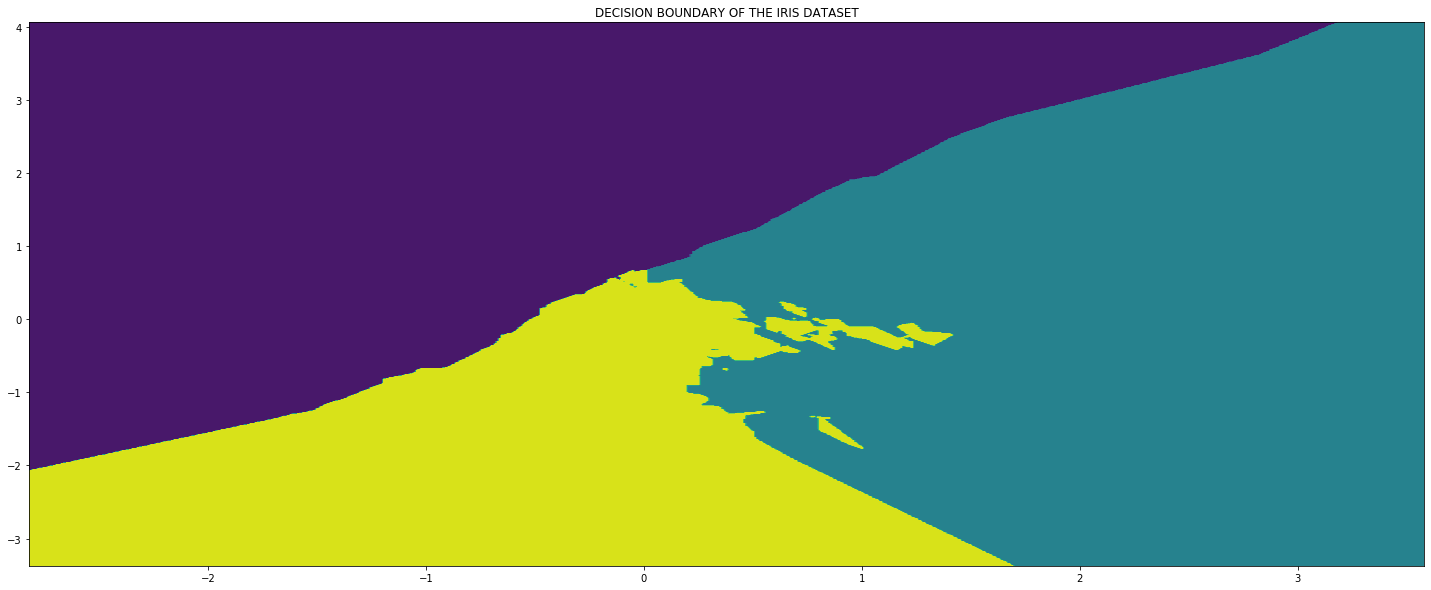

In [139]:
plt.figure(figsize=(25,10))
plt.contourf(XX,YY,labels.reshape(744,641))
plt.title('DECISION BOUNDARY OF THE IRIS DATASET')
plt.show()


# STEP 5:PLOTTING ALL THE TRAINING DATA ON THE PLOT

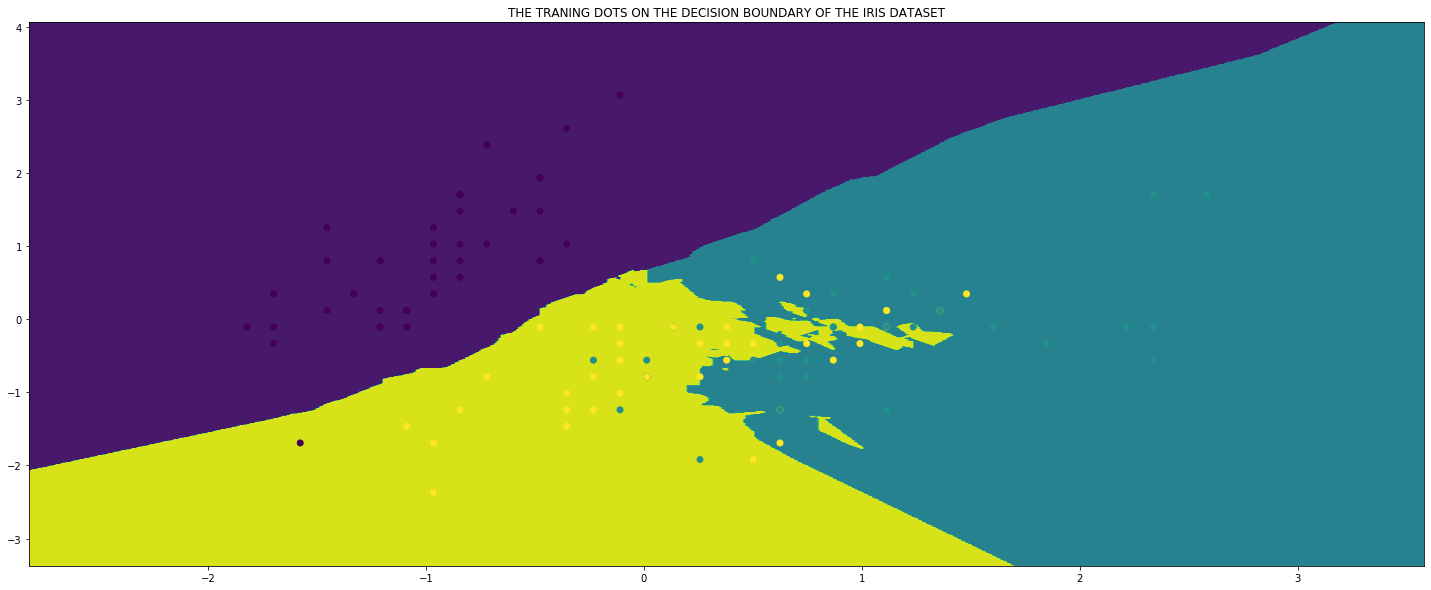

In [143]:
plt.figure(figsize=(25,10))
plt.contourf(XX,YY,labels.reshape(744,641))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.title('THE TRANING DOTS ON THE DECISION BOUNDARY OF THE IRIS DATASET')
plt.show()
#these dots are the traing data plotted on the meshgrid where we have drawn our decision boundary